In [ ]:
%matplotlib inline

In [1]:
import os, sys
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Wedge, Rectangle


def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points


def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

def gauge(labels=['LOW','MEDIUM','HIGH','VERY HIGH','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
    
    """
    some sanity checks first
    
    """
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

## TESTING

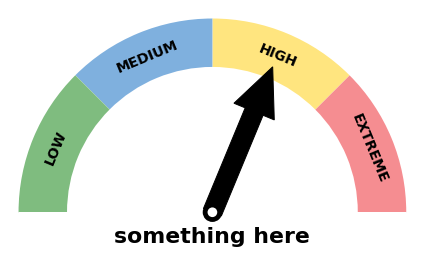

In [2]:

gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
      colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], arrow=3, title='something here') 

## Remove function portion

In [ ]:
import os, sys
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Wedge, Rectangle


def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    print(f"start: {start}")
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    print(f"end: {end}")
    mid_points = start + ((end-start)/2.)
    print(f"Mid Points: {mid_points}")
    print(np.c_[start, end], mid_points)
    return np.c_[start, end], mid_points


def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

labels=['LOW','MEDIUM','HIGH','VERY HIGH','EXTREME']
colors='jet_r'
arrow=1
title=''
fname=False
    
"""
some sanity checks first

"""

N = len(labels)

if arrow > N: 
    raise Exception("\n\nThe category ({}) is greated than \
    the length\nof the labels ({})".format(arrow, N))


"""
if colors is a string, we assume it's a matplotlib colormap
and we discretize in N discrete colors 
"""

if isinstance(colors, str):
    cmap = cm.get_cmap(colors, N)
    cmap = cmap(np.arange(N))
    colors = cmap[::-1,:].tolist()
if isinstance(colors, list): 
    if len(colors) == N:
        colors = colors[::-1]
    else: 
        raise Exception("\n\nnumber of colors {} not equal \
        to number of categories{}\n".format(len(colors), N))

"""
begins the plotting
"""

fig, ax = plt.subplots()

ang_range, mid_points = degree_range(N)

labels = labels[::-1]

"""
plots the sectors and the arcs
"""
patches = []
for ang, c in zip(ang_range, colors): 
    # sectors
    patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
    # arcs
    patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))

[ax.add_patch(p) for p in patches]


"""
set the labels (e.g. 'LOW','MEDIUM',...)
"""

for mid, lab in zip(mid_points, labels): 

    ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
        horizontalalignment='center', verticalalignment='center', fontsize=14, \
        fontweight='bold', rotation = rot_text(mid))

"""
set the bottom banner and the title
"""
r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
ax.add_patch(r)

ax.text(0, -0.05, title, horizontalalignment='center', \
        verticalalignment='center', fontsize=22, fontweight='bold')

"""
plots the arrow now
"""

pos = mid_points[abs(arrow - N)]

ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')

ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

"""
removes frame and ticks, and makes axis equal and tight
"""

ax.set_frame_on(False)
ax.axes.set_xticks([])
ax.axes.set_yticks([])
ax.axis('equal')
plt.tight_layout()
if fname:
    fig.savefig(fname, dpi=200)